In [1]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
# Step 1. Load the dataset
# Credits:  California Cooperative Oceanic Fisheries Investigations
# URL: https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv
# Drescription: The CalCOFI data set represents the longest (1949-present) 
# and most complete (more than 50,000 sampling stations) time series of 
# oceanographic and larval fish data in the world. It includes abundance 
# data on the larvae of over 250 species of fish; larval length frequency 
# data and egg abundance data on key commercial species; and oceanographic 
# and plankton data. The physical, chemical, and biological data collected 
# at regular time and space intervals quickly became valuable for 
# documenting climatic cycles in the California Current and a range of 
# biological responses to them. 
df_raw = pd.read_csv('data/calcofi_reduced.csv', index_col=0)

# Nueva sección

In [14]:
# 1.1 Get basic info
df_raw.info()
#300 rows, 2 columns, no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [15]:
# 1.2 Take a sample
df_raw.sample(10)

,Salnty,T_degC
69,33.518,8.90
218,33.000,11.95
186,33.672,7.75
95,33.147,10.21
150,34.050,4.44
3,34.225,4.17
274,32.740,9.29
206,32.900,12.22
160,32.700,10.22
103,33.150,10.67


In [ ]:
# 1.3 Transform if needed
#No es necesario en este caso (no hay categóricas ni dates)

In [16]:
# Step 2. Make a basic EDA
df = df_raw.copy()

In [18]:
# 2.1 Split the dataset to avoid bias
X = df['Salnty']
y = df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40) #Splits 0.25 test | 0.75 train por default

In [19]:
# 2.2 Join the train sets to ease insights
df_train = pd.DataFrame({'Salinity': X_train, 'Temperature': y_train})

In [20]:
# 2.3 Get basic info
df_train.info()
#225 rows, 2 cols, no nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 243 to 219
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salinity     225 non-null    float64
 1   Temperature  225 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


In [21]:
# 2.4 Take a sample
df_train.sample(10)

,Salinity,Temperature
22,32.950,9.69
20,33.957,7.91
276,33.356,9.36
116,32.740,10.47
225,32.882,11.61
270,34.210,5.01
221,33.916,6.98
70,33.580,8.29
1,33.096,12.49
148,33.980,5.34


In [22]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,Salinity,Temperature
count,225.000000,225.000000
mean,33.605831,7.937244
std,0.559792,2.996976
min,32.630000,2.780000
25%,33.000000,5.020000
50%,33.800000,8.180000
75%,34.101000,10.470000
max,34.430000,12.660000


In [ ]:
# 2.6 Describe the categorical variables
#No aplica a este df

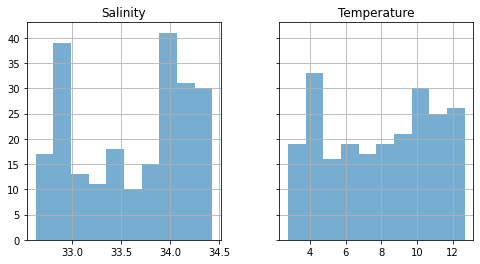

In [35]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize = (8,4), sharey = True, alpha = 0.6) #sharey same scale
plt.show()

#Reminder: los datos no tienen por qué tener distribución normal, los errores sí

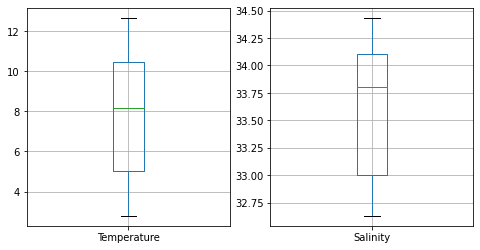

In [37]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(1,2, figsize = (8,4))
df_train[['Temperature']].boxplot(ax = ax[0])
df_train[['Salinity']].boxplot(ax = ax[1])

plt.show()

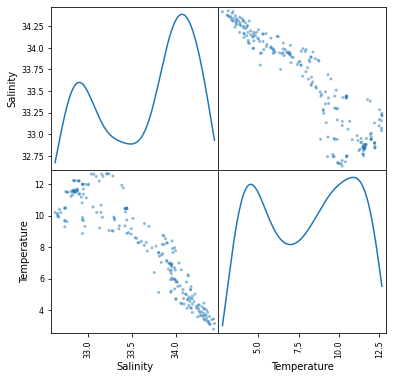

In [38]:
#2.9 Perfom bivariate analysis - scatter matrix
pd.plotting.scatter_matrix(df_train, diagonal = 'kde', figsize = (6,6))
plt.show()

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial


In [ ]:
# 2.11 Perform multivariate analysis - VIF
#Esto es para detectar si hay multicolinealidad (uno contra varios), no lo vamos a ver ahora porque tenemos dos variables

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals
#En este paso hay que definir el approach, por ej.: 'Goal: pronosticar la salinidad en base a la temperatura'
#El approach va a ser utilizando modelos de regresión lineal/logística/decision tree

In [ ]:
# 3.1 Perform model fit - A
#Vamos a hacer regresión lineal de dos maneras, uno con sklearn y otro con statsmodel (el resultado va a ser lo mismo)

In [49]:
sklm = LinearRegression()
sklm.fit(X_train.to_frame(), y_train ) #cuando hay solamente una variable predictora sklearn lo interpreta como una lista
score = sklm.score(X_train.to_frame(), y_train)
print(f'El R square es {score: .4f}')

#Rsquare: proportion if the variance in DV explained by IV
#Este score es calculado sobre el dataset de aprendizaje
#84% de la var dependiente está explicada por la varianza de la independiente
#Si después miramos el gráfico nos damos cuenta que nosotros usamos una curva para ajustar y en realidad los azules son como una curva,
#podríamos tunearlo con un modelo cuadrático

El R square es  0.8454


In [44]:
predictions = sklm.predict(X_test.to_frame())
print(f'El R square es {r2_score(y_test, predictions)}')
print(f'El RMSE es {mean_squared_error(y_test, predictions, squared = False)}')
#Este score es con el train

El R square es 0.7863151702808187
El RMSE es 1.316206920253402


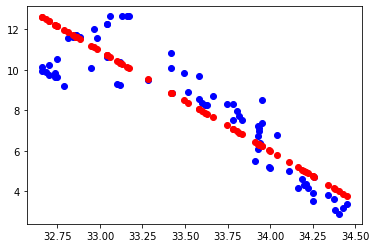

In [46]:
plt.scatter(x = X_test, y = y_test, color = 'Blue')
plt.scatter(x = X_test, y = predictions, color = 'Red')
plt.show()

#Este es el ajuste del modelo de salinidad pronosticando la temperatura

In [48]:
# 3.2 Perform model fit - B
#Otra manera de hacer el mismo modelo
results = smf.ols('Temperature ~ Salinity', data=df_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-92
Time:                        22:18:05   Log-Likelihood:                -355.70
No. Observations:                 225   AIC:                             715.4
Df Residuals:                     223   BIC:                             722.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.3618      4.738     36.590      0.0

In [ ]:
# 3.3 Calculate metrics on model A


In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions
#Hemos utilizado los siguientes pasos para calcular tal, tomamos la decisión de quitar valores por tal cosa, concluímos que este modelo se puede ajustar a los valores reales con x resultado"